In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm
import itertools
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Import time series

In [6]:
import pickle
with open('./data/melted_zip9.pickle', 'rb') as file:
    melted_zip9 = pickle.load(file)
    

# ARIMA Modeling

In [7]:
melted_zip9.head()

,value
time,
1996-04-01,26400.0
1996-05-01,26400.0
1996-06-01,26500.0
1996-07-01,26500.0
1996-08-01,26500.0


In [8]:
ts1 = melted_zip9['2010-01-01':]
ts1

,value
time,
2010-01-01,77400.0
2010-02-01,77100.0
2010-03-01,77300.0
2010-04-01,76200.0
2010-05-01,74500.0
...,...
2017-12-01,94600.0
2018-01-01,95100.0
2018-02-01,95500.0


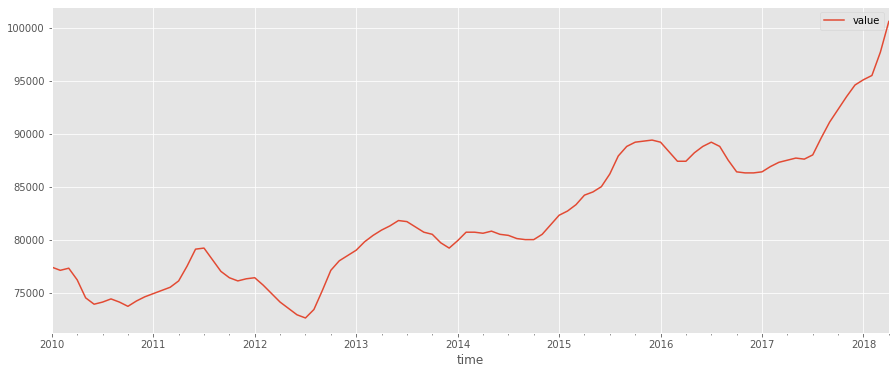

              value
time               
2010-01-01  77400.0
2010-02-01  77100.0
2010-03-01  77300.0
2010-04-01  76200.0
2010-05-01  74500.0


In [9]:
#ts1 = melted_zip2['value'].resample('MS').mean()
ts1 = ts1.fillna(ts1.bfill())
ts1.plot(figsize=(15,6))
plt.show()

print(ts1.head())

In [10]:
warnings.filterwarnings('ignore')
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)  

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 1) for x in list(itertools.product(p, d, q))]

In [11]:
warnings.filterwarnings('ignore')
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts1,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue  

ARIMA (0, 0, 0) x (0, 0, 0, 1)12 : AIC Calculated =2524.036909356767
ARIMA (0, 0, 0) x (0, 0, 1, 1)12 : AIC Calculated =9343.459842638227
ARIMA (0, 0, 0) x (0, 0, 2, 1)12 : AIC Calculated =3136.359721465665
ARIMA (0, 0, 0) x (0, 1, 0, 1)12 : AIC Calculated =1597.0717418826341
ARIMA (0, 0, 0) x (0, 1, 1, 1)12 : AIC Calculated =1497.0504593997662
ARIMA (0, 0, 0) x (0, 1, 2, 1)12 : AIC Calculated =1447.1531258196355
ARIMA (0, 0, 0) x (0, 2, 0, 1)12 : AIC Calculated =1509.3522742055875
ARIMA (0, 0, 0) x (0, 2, 1, 1)12 : AIC Calculated =1468.5983458651199
ARIMA (0, 0, 0) x (0, 2, 2, 1)12 : AIC Calculated =1449.8228765636238
ARIMA (0, 0, 0) x (1, 0, 0, 1)12 : AIC Calculated =1604.9324139143453
ARIMA (0, 0, 0) x (1, 0, 1, 1)12 : AIC Calculated =1508.7433446595392
ARIMA (0, 0, 0) x (1, 0, 2, 1)12 : AIC Calculated =1463.3988891775705
ARIMA (0, 0, 0) x (1, 1, 0, 1)12 : AIC Calculated =1519.035562029576
ARIMA (0, 0, 0) x (1, 1, 1, 1)12 : AIC Calculated =1488.4892770131103
ARIMA (0, 0, 0) x (1, 1,

ARIMA (0, 1, 1) x (1, 0, 1, 1)12 : AIC Calculated =1452.78770461203
ARIMA (0, 1, 1) x (1, 0, 2, 1)12 : AIC Calculated =1427.6353327131362
ARIMA (0, 1, 1) x (1, 1, 0, 1)12 : AIC Calculated =1468.0021338860927
ARIMA (0, 1, 1) x (1, 1, 1, 1)12 : AIC Calculated =1438.534831248499
ARIMA (0, 1, 1) x (1, 1, 2, 1)12 : AIC Calculated =1423.115638146066
ARIMA (0, 1, 1) x (1, 2, 0, 1)12 : AIC Calculated =1494.5951992948821
ARIMA (0, 1, 1) x (1, 2, 1, 1)12 : AIC Calculated =1443.0068390108713
ARIMA (0, 1, 1) x (1, 2, 2, 1)12 : AIC Calculated =1418.14451721504
ARIMA (0, 1, 1) x (2, 0, 0, 1)12 : AIC Calculated =1474.798348981502
ARIMA (0, 1, 1) x (2, 0, 1, 1)12 : AIC Calculated =1451.4943989480748
ARIMA (0, 1, 1) x (2, 0, 2, 1)12 : AIC Calculated =1430.922696370768
ARIMA (0, 1, 1) x (2, 1, 0, 1)12 : AIC Calculated =1456.116123236593
ARIMA (0, 1, 1) x (2, 1, 1, 1)12 : AIC Calculated =1440.1181972869097
ARIMA (0, 1, 1) x (2, 1, 2, 1)12 : AIC Calculated =1424.5163952081184
ARIMA (0, 1, 1) x (2, 2, 0, 1

ARIMA (0, 2, 2) x (2, 0, 2, 1)12 : AIC Calculated =1406.5605915446256
ARIMA (0, 2, 2) x (2, 1, 0, 1)12 : AIC Calculated =1435.0689788588302
ARIMA (0, 2, 2) x (2, 1, 1, 1)12 : AIC Calculated =1416.8768176423646
ARIMA (0, 2, 2) x (2, 1, 2, 1)12 : AIC Calculated =1402.271721491976
ARIMA (0, 2, 2) x (2, 2, 0, 1)12 : AIC Calculated =1487.3970782472065
ARIMA (0, 2, 2) x (2, 2, 1, 1)12 : AIC Calculated =1427.366938594235
ARIMA (0, 2, 2) x (2, 2, 2, 1)12 : AIC Calculated =1421.9041051493532
ARIMA (1, 0, 0) x (0, 0, 0, 1)12 : AIC Calculated =1604.9324139143453
ARIMA (1, 0, 0) x (0, 0, 1, 1)12 : AIC Calculated =1594.0289215888304
ARIMA (1, 0, 0) x (0, 0, 2, 1)12 : AIC Calculated =1510.774473570657
ARIMA (1, 0, 0) x (0, 1, 0, 1)12 : AIC Calculated =1519.035562029576
ARIMA (1, 0, 0) x (0, 1, 1, 1)12 : AIC Calculated =1490.5508791799573
ARIMA (1, 0, 0) x (0, 1, 2, 1)12 : AIC Calculated =1452.7877047382208
ARIMA (1, 0, 0) x (0, 2, 0, 1)12 : AIC Calculated =1504.5283149447823
ARIMA (1, 0, 0) x (0, 2,

ARIMA (1, 1, 1) x (0, 1, 0, 1)12 : AIC Calculated =1468.0021338706301
ARIMA (1, 1, 1) x (0, 1, 1, 1)12 : AIC Calculated =1438.5531076957245
ARIMA (1, 1, 1) x (0, 1, 2, 1)12 : AIC Calculated =1423.1156380421871
ARIMA (1, 1, 1) x (0, 2, 0, 1)12 : AIC Calculated =1494.5951993065123
ARIMA (1, 1, 1) x (0, 2, 1, 1)12 : AIC Calculated =1443.0068390142274
ARIMA (1, 1, 1) x (0, 2, 2, 1)12 : AIC Calculated =1417.8988435732329
ARIMA (1, 1, 1) x (1, 0, 0, 1)12 : AIC Calculated =1490.0679017225686
ARIMA (1, 1, 1) x (1, 0, 1, 1)12 : AIC Calculated =1452.5438362991176
ARIMA (1, 1, 1) x (1, 0, 2, 1)12 : AIC Calculated =1429.0246641563567
ARIMA (1, 1, 1) x (1, 1, 0, 1)12 : AIC Calculated =1469.846462738293
ARIMA (1, 1, 1) x (1, 1, 1, 1)12 : AIC Calculated =1462.7433608407903
ARIMA (1, 1, 1) x (1, 1, 2, 1)12 : AIC Calculated =1424.9941117212243
ARIMA (1, 1, 1) x (1, 2, 0, 1)12 : AIC Calculated =1492.4515832592847
ARIMA (1, 1, 1) x (1, 2, 1, 1)12 : AIC Calculated =1472.3695875511812
ARIMA (1, 1, 1) x (1,

ARIMA (1, 2, 2) x (1, 1, 1, 1)12 : AIC Calculated =1416.8767855361323
ARIMA (1, 2, 2) x (1, 1, 2, 1)12 : AIC Calculated =1407.7066533776067
ARIMA (1, 2, 2) x (1, 2, 0, 1)12 : AIC Calculated =1494.1046645016506
ARIMA (1, 2, 2) x (1, 2, 1, 1)12 : AIC Calculated =1429.4743286900884
ARIMA (1, 2, 2) x (1, 2, 2, 1)12 : AIC Calculated =1445.0357091807023
ARIMA (1, 2, 2) x (2, 0, 0, 1)12 : AIC Calculated =1435.734839478172
ARIMA (1, 2, 2) x (2, 0, 1, 1)12 : AIC Calculated =1426.5699419966056
ARIMA (1, 2, 2) x (2, 0, 2, 1)12 : AIC Calculated =1412.0565274544338
ARIMA (1, 2, 2) x (2, 1, 0, 1)12 : AIC Calculated =1430.773665462133
ARIMA (1, 2, 2) x (2, 1, 1, 1)12 : AIC Calculated =1416.5845211881483
ARIMA (1, 2, 2) x (2, 1, 2, 1)12 : AIC Calculated =1404.6418866943782
ARIMA (1, 2, 2) x (2, 2, 0, 1)12 : AIC Calculated =1483.737530908523
ARIMA (1, 2, 2) x (2, 2, 1, 1)12 : AIC Calculated =1435.1039952532637
ARIMA (1, 2, 2) x (2, 2, 2, 1)12 : AIC Calculated =1421.4529200740578
ARIMA (2, 0, 0) x (0, 0

ARIMA (2, 1, 0) x (2, 1, 2, 1)12 : AIC Calculated =1424.91347293721
ARIMA (2, 1, 0) x (2, 2, 0, 1)12 : AIC Calculated =1447.8284830347054
ARIMA (2, 1, 0) x (2, 2, 1, 1)12 : AIC Calculated =1428.3869795572675
ARIMA (2, 1, 0) x (2, 2, 2, 1)12 : AIC Calculated =1424.991565673042
ARIMA (2, 1, 1) x (0, 0, 0, 1)12 : AIC Calculated =1475.0129699859629
ARIMA (2, 1, 1) x (0, 0, 1, 1)12 : AIC Calculated =1451.495884667077
ARIMA (2, 1, 1) x (0, 0, 2, 1)12 : AIC Calculated =1429.363798737199
ARIMA (2, 1, 1) x (0, 1, 0, 1)12 : AIC Calculated =1456.1161586888093
ARIMA (2, 1, 1) x (0, 1, 1, 1)12 : AIC Calculated =1440.182560127551
ARIMA (2, 1, 1) x (0, 1, 2, 1)12 : AIC Calculated =1424.5163941103299
ARIMA (2, 1, 1) x (0, 2, 0, 1)12 : AIC Calculated =1479.6486100547004
ARIMA (2, 1, 1) x (0, 2, 1, 1)12 : AIC Calculated =1436.816840526043
ARIMA (2, 1, 1) x (0, 2, 2, 1)12 : AIC Calculated =1416.876785461344
ARIMA (2, 1, 1) x (1, 0, 0, 1)12 : AIC Calculated =1451.540910009885
ARIMA (2, 1, 1) x (1, 0, 1, 1

ARIMA (2, 2, 2) x (0, 2, 1, 1)12 : AIC Calculated =1422.8277937930648
ARIMA (2, 2, 2) x (0, 2, 2, 1)12 : AIC Calculated =1411.0710350112367
ARIMA (2, 2, 2) x (1, 0, 0, 1)12 : AIC Calculated =1435.7348394684022
ARIMA (2, 2, 2) x (1, 0, 1, 1)12 : AIC Calculated =1425.5836991582948
ARIMA (2, 2, 2) x (1, 0, 2, 1)12 : AIC Calculated =1412.056744456104
ARIMA (2, 2, 2) x (1, 1, 0, 1)12 : AIC Calculated =1430.7734288275321
ARIMA (2, 2, 2) x (1, 1, 1, 1)12 : AIC Calculated =1416.584521215755
ARIMA (2, 2, 2) x (1, 1, 2, 1)12 : AIC Calculated =1403.6847448444819
ARIMA (2, 2, 2) x (1, 2, 0, 1)12 : AIC Calculated =1483.767551325744
ARIMA (2, 2, 2) x (1, 2, 1, 1)12 : AIC Calculated =1431.2644989749967
ARIMA (2, 2, 2) x (1, 2, 2, 1)12 : AIC Calculated =1417.714294345162
ARIMA (2, 2, 2) x (2, 0, 0, 1)12 : AIC Calculated =1424.791047684964
ARIMA (2, 2, 2) x (2, 0, 1, 1)12 : AIC Calculated =1426.7610894515283
ARIMA (2, 2, 2) x (2, 0, 2, 1)12 : AIC Calculated =1416.0352303932982
ARIMA (2, 2, 2) x (2, 1, 

In [12]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq        (1, 0, 2)
pdqs    (0, 2, 2, 1)
aic           1398.1
Name: 305, dtype: object

In [13]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(ts1, 
                                        order=(1, 0, 2), 
                                        seasonal_order=(0, 2, 2, 1), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2785      0.091     -3.070      0.002      -0.456      -0.101
ma.L1         -0.8721      0.132     -6.609      0.000      -1.131      -0.613
ma.L2         -0.0694      0.113     -0.612      0.541      -0.292       0.153
ma.S.L1        1.6226      1.362      1.192      0.233      -1.046       4.291
ma.S.L2        1.0002      1.666      0.600      0.548      -2.265       4.266
sigma2      1.532e+05   2.54e+05      0.603      0.546   -3.44e+05    6.51e+05


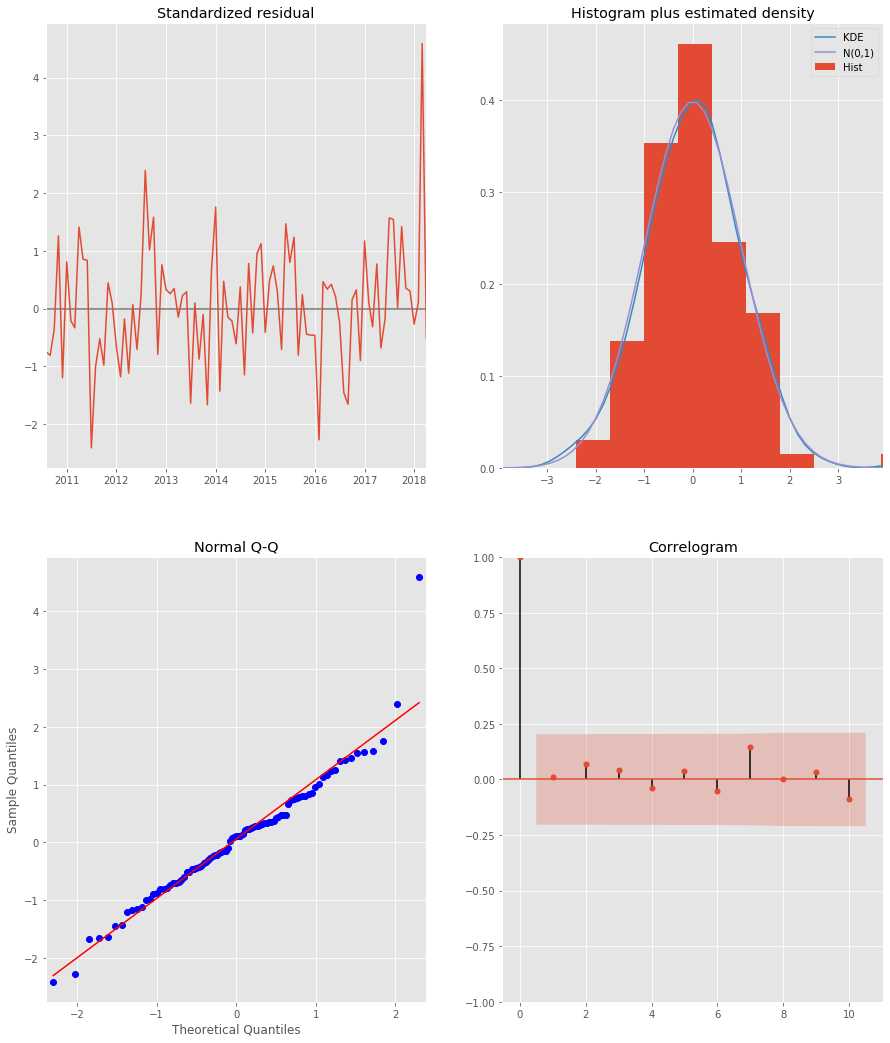

In [14]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

## One-step Ahead Forecasting

In [16]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_conf = pred.conf_int()

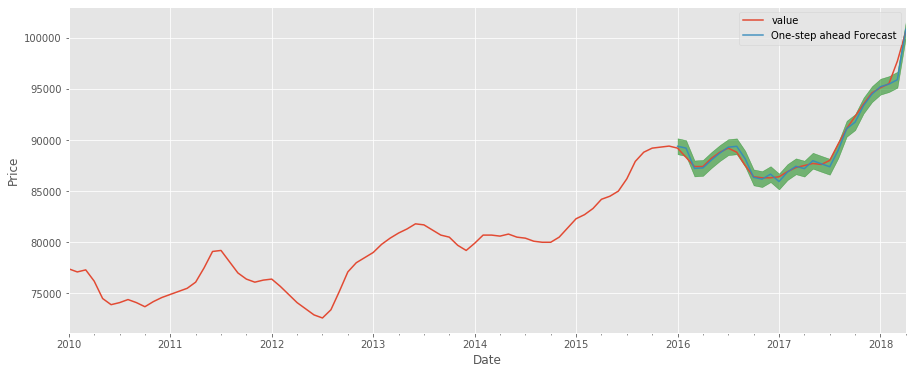

In [17]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = ts1['2010-01-01':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

In [165]:
# pred.predicted_mean

In [18]:
# Get the real and predicted values
ts1_forecasted = pred.predicted_mean
ts1_truth = ts1['2016-01-01':]
mse = mean_squared_error(ts1_truth, ts1_forecasted)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))




The Root Mean Squared Error of our forecasts is 489.78


## Dynamic Forecasting

In [19]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

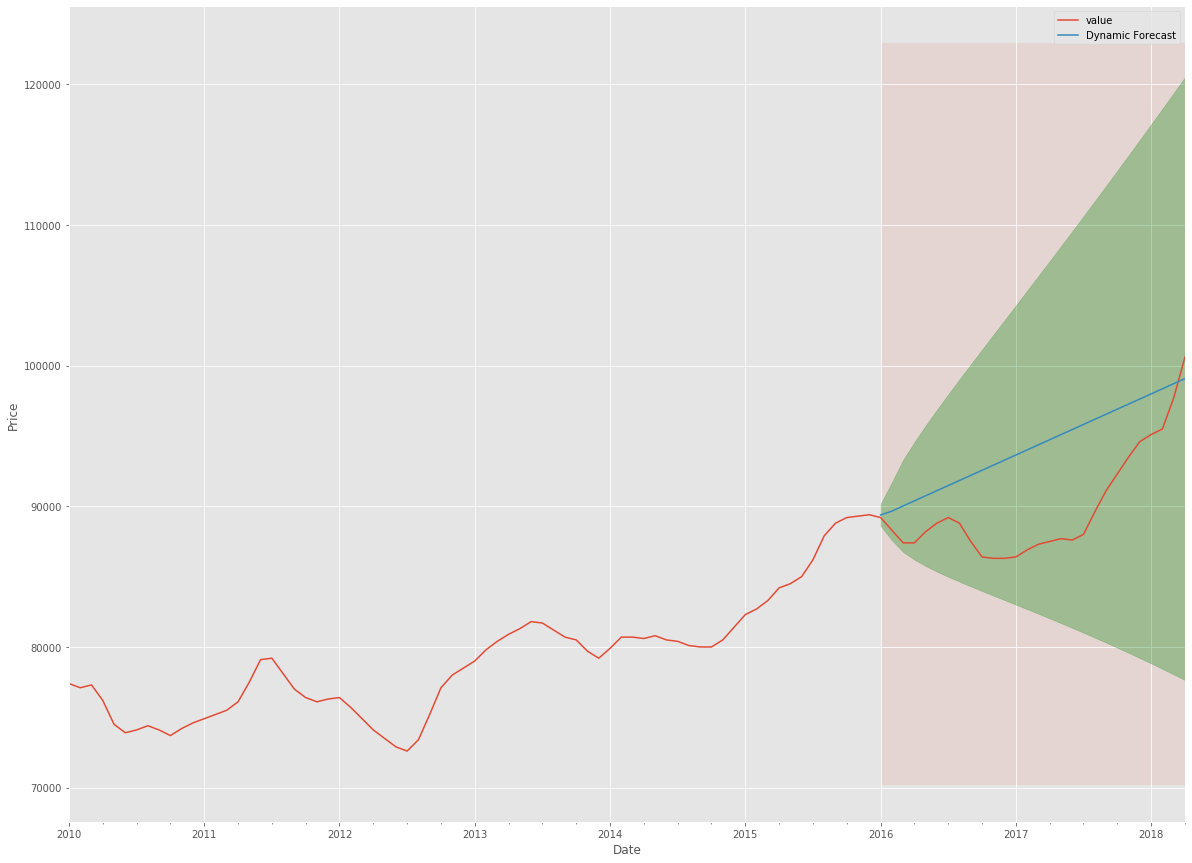

In [20]:
# Plot the dynamic forecast with confidence intervals.

ax = ts1['2010':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)


ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-01-01'), ts1_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [21]:
# Get the real and predicted values
ts1_forecasted = pred_dynamic.predicted_mean
ts1_truth = ts1['2016-01-01':]
mse = mean_squared_error(ts1_truth, ts1_forecasted)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 5059.74


In [22]:
print(mse)

25600989.80460151


## Producing and visualising forecasts

In [23]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

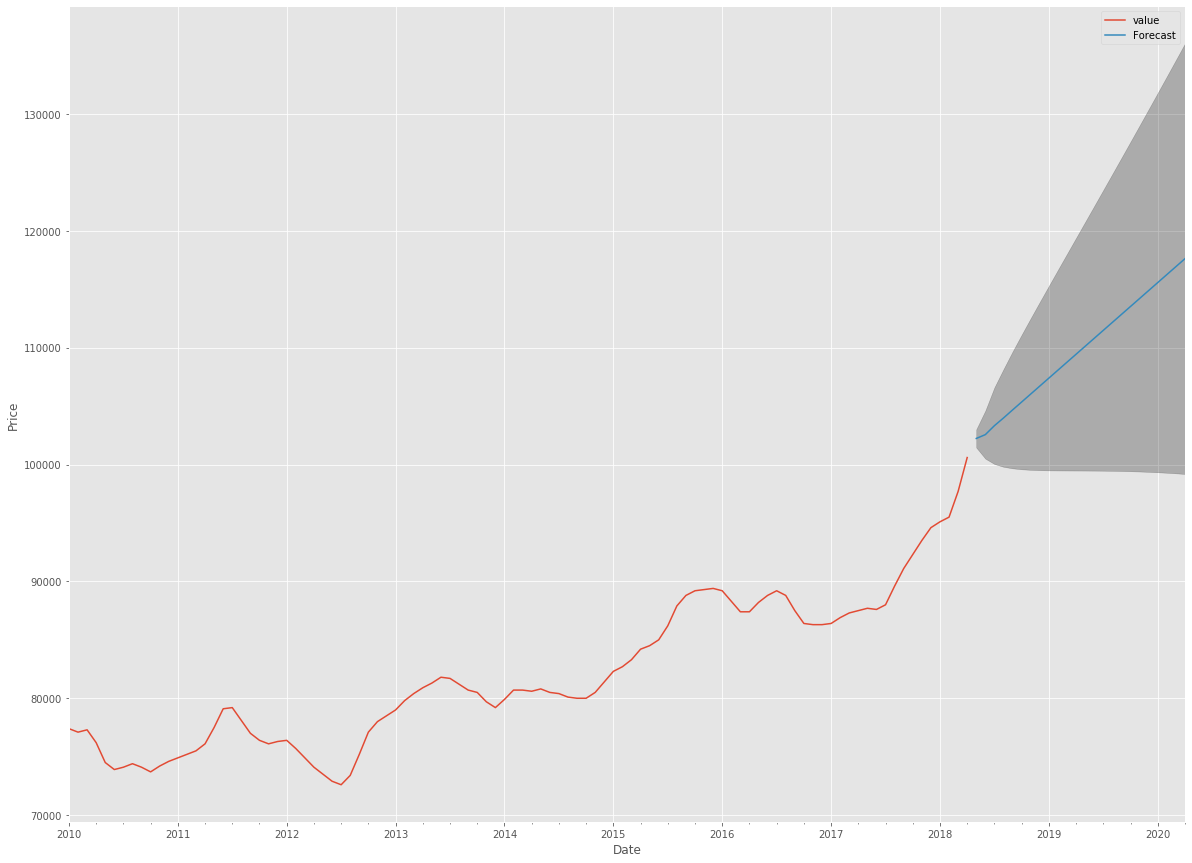

In [24]:
# Plot future predictions with confidence intervals
ax = ts1.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [25]:
prediction.predicted_mean['2020-01-01']

115571.53225373189

In [26]:
# ROI
print((prediction.predicted_mean['2020-01-01']/ts1['2018-01'])-1)

               value
time                
2018-01-01  0.215263
